In [1]:
from mylib.statistic_test import *

code_id = "0875 - Detailed Map Extraction and Stability Analysis"
loc = join(figpath, code_id)
mkdir(loc)

dir_name = join(figpath, "Dsp", "Reforming Neural Trajectory Analysis") 

d:\Software\Anaconda3\envs\maze\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


        D:\Data\FinalResults\0875 - Detailed Map Extraction and Stability Analysis is already existed!


100%|██████████| 6/6 [00:00<00:00, 252.83it/s]


8640


C:\Users\Shuyang Yao\AppData\Local\Temp\ipykernel_14332\36040424.py:121: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


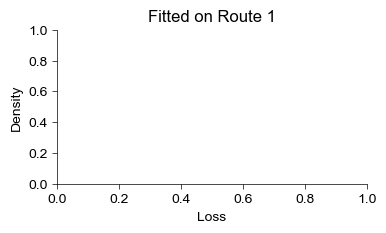

C:\Users\Shuyang Yao\AppData\Local\Temp\ipykernel_14332\36040424.py:121: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.lineplot(


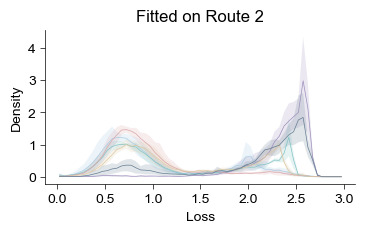

C:\Users\Shuyang Yao\AppData\Local\Temp\ipykernel_14332\36040424.py:121: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.lineplot(


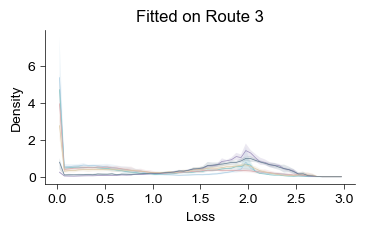

C:\Users\Shuyang Yao\AppData\Local\Temp\ipykernel_14332\36040424.py:121: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.lineplot(


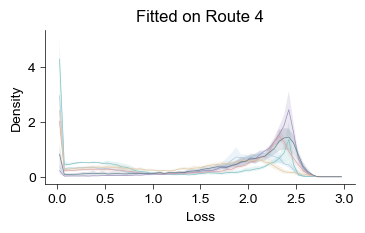

C:\Users\Shuyang Yao\AppData\Local\Temp\ipykernel_14332\36040424.py:121: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.lineplot(


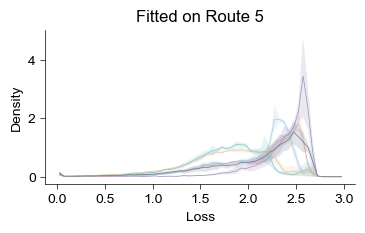

C:\Users\Shuyang Yao\AppData\Local\Temp\ipykernel_14332\36040424.py:121: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.lineplot(


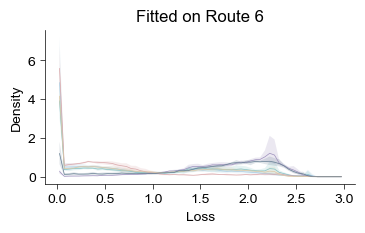

C:\Users\Shuyang Yao\AppData\Local\Temp\ipykernel_14332\36040424.py:121: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.lineplot(


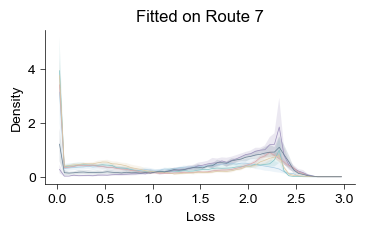

In [27]:
def normalize_losses(mouse: int):
    with open(join(dir_name, f"{mouse}.pkl"), 'rb') as f:
        res = pickle.load(f)

    nodes_traj = res['raw_nodes_traj']

    route_traj = res['raw_route_traj']
    session_traj = res['raw_session_traj']
    smoothed_loss_traj = res['raw_smoothed_loss_traj']

    father_nodes_traj = S2F[nodes_traj-1]

    behav_params_templ_traj = res['behav_params_templ_traj']
    behav_to_raw_traj = res['behav_to_raw_traj']
    behav_params_traj = res['behav_params_traj']
    raw_params_traj = behav_params_traj[:, behav_to_raw_traj]
    raw_params_templ_traj = behav_params_templ_traj[:, behav_to_raw_traj]

    behav_res_angles = raw_params_traj[4, :] - raw_params_templ_traj[2, :]
    behav_res_angles[behav_res_angles > np.pi] = 2*np.pi - behav_res_angles[behav_res_angles > np.pi]
    behav_res_angles[behav_res_angles < -np.pi] = -2*np.pi - behav_res_angles[behav_res_angles < -np.pi]
    
    norm_loss_traj = np.zeros((7, smoothed_loss_traj.shape[1]), dtype=np.float64)
    father_nodes_traj = S2F[nodes_traj-1]
    
    included_traj = np.where((np.isin(father_nodes_traj, CP_DSPs[1][0])) & (np.abs(behav_res_angles) <= np.pi/3))[0]
    part_traj = res['raw_part_traj'][included_traj]
    father_nodes_traj = father_nodes_traj[included_traj]
    session_traj = session_traj[included_traj]
    route_traj = route_traj[included_traj]
    smoothed_loss_traj = smoothed_loss_traj[:, included_traj]
    
    norm_loss_included = np.zeros((7, included_traj.shape[0]), dtype=np.float64)
    
    print(f"{mouse} ------")
    for s in tqdm(range(7)):
        part_0_idx = np.where((part_traj == 0) & (session_traj == s) & (route_traj == 0))[0]
        part_1_idx = np.where((part_traj == 1) & (session_traj == s) & (route_traj == 0))[0]
        part_0_all = np.where((part_traj == 0) & (session_traj == s))[0]
        part_1_all = np.where((part_traj == 1) & (session_traj == s))[0]
            
        mean_1_to_0 = np.mean(smoothed_loss_traj[8, part_0_idx])
        std_1_to_0 = np.std(smoothed_loss_traj[8, part_0_idx])  #
        mean_0_to_1 = np.mean(smoothed_loss_traj[7, part_1_idx])
        std_0_to_1 = np.std(smoothed_loss_traj[7, part_1_idx])
            
        mean_0_to_0 = np.mean(smoothed_loss_traj[7, part_0_idx])
        std_0_to_0 = np.std(smoothed_loss_traj[7, part_0_idx])
        mean_1_to_1 = np.mean(smoothed_loss_traj[8, part_1_idx])
        std_1_to_1 = np.std(smoothed_loss_traj[8, part_1_idx])
            
        norm_loss_included[1:4, part_0_all] = (smoothed_loss_traj[1:4, part_0_all] - mean_0_to_0)
        norm_loss_included[4:7, part_1_all] = (smoothed_loss_traj[4:7, part_1_all] - mean_1_to_1)
        norm_loss_included[1:4, part_1_all] = (smoothed_loss_traj[1:4, part_1_all] - mean_0_to_1)
        norm_loss_included[4:7, part_0_all] = (smoothed_loss_traj[4:7, part_0_all] - mean_1_to_0)
    
    norm_loss_traj[:, included_traj] = norm_loss_included
    res['raw_norm_loss_traj'] = norm_loss_traj
    res['raw_included_traj'] = np.zeros(norm_loss_traj.shape[1], dtype=bool)
    res['raw_included_traj'][included_traj] = True
    with open(join(dir_name, f"{mouse}.pkl"), 'wb') as f:
        pickle.dump(res, f)

"""
normalize_losses(10212)
normalize_losses(10224)
normalize_losses(10227)
normalize_losses(10232)
"""

if exists(join(figdata, f"{code_id} [Loss Distributions].pkl")) == False:
    LossDist = {
        "MiceID": [],
        "Fit Route": [],
        "Test Route": [],
        "Loss": [],
        "Density": []
    }
    N_BINS = 60
    _RANGE = (0, 3)
    X = np.linspace(0, 3, N_BINS+1)
    X = (X[1:] + X[:-1]) / 2
    for mouse in [10212, 10224, 10227, 10232]:
        with open(join(dir_name, f"{mouse}.pkl"), 'rb') as f:
            res = pickle.load(f)

        included_traj = res['raw_included_traj']
        smoothed_loss_traj = res['raw_smoothed_loss_traj'][:, included_traj]
        route_traj = res['raw_route_traj'][included_traj]

        smoothed_loss_traj[1:4, :] -= smoothed_loss_traj[7:8, :]
        smoothed_loss_traj[4:7, :] -= smoothed_loss_traj[8:9, :]
        smoothed_loss_traj = np.log10(np.clip(np.abs(smoothed_loss_traj), a_min=1, a_max=None))
        for rt in tqdm(range(1, 7)):
            for rt_test in range(1, 7):
                
                density = np.histogram(smoothed_loss_traj[rt-1, route_traj == rt_test], bins=N_BINS, range=_RANGE, density=True)[0]
                LossDist['MiceID'].append(np.repeat(mouse, density.shape[0]))
                LossDist['Fit Route'].append(np.repeat(rt, density.shape[0]))
                LossDist['Test Route'].append(np.repeat(rt_test, density.shape[0]))
                LossDist['Loss'].append(X)
                LossDist['Density'].append(density) 
            
    for key in LossDist.keys():
        LossDist[key] = np.concatenate(LossDist[key])
        
    with open(join(figdata, f"{code_id} [Loss Distributions].pkl"), 'wb') as f:
        pickle.dump(LossDist, f)
        
    LossDistDF = pd.DataFrame(LossDist)
    LossDistDF.to_excel(join(figdata, f"{code_id} [Loss Distributions].xlsx"), index=False)
    print(len(LossDistDF))
else:
    with open(join(figdata, f"{code_id} [Loss Distributions].pkl"), 'rb') as f:
        LossDist = pickle.load(f)

for rt_fit in range(7):
    subdata = SubDict(LossDist, LossDist.keys(), np.where(LossDist['Fit Route'] == rt_fit)[0])
    fig = plt.figure(figsize=(4, 2))
    ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
    sns.lineplot(
        x='Loss', 
        y='Density', 
        hue='Test Route',
        data=subdata,
        lw=0.5,
        err_kws={'edgecolor': None},
        palette=DSPPalette[:7],
        legend=False
    )
    ax.set_title(f"Fitted on Route {rt_fit+1}")
    #ax.axvline(np.log10(20), ls='--', color='k', lw=0.5)
    #x = np.concatenate([np.arange(1, 10), np.arange(10, 100, 10), np.arange(100, 1001, 100)])
    #ax.set_xticks(np.log10(x))
    plt.show()

# Extract Maps

  0%|          | 0/7 [00:00<?, ?it/s]d:\Software\Anaconda3\envs\maze\lib\site-packages\mazepy\datastruc\neuact.py:1123: RuntimeWarning: invalid value encountered in divide
  firing_rate = spike_counts/(occu_time/1000)
100%|██████████| 7/7 [00:15<00:00,  2.22s/it]


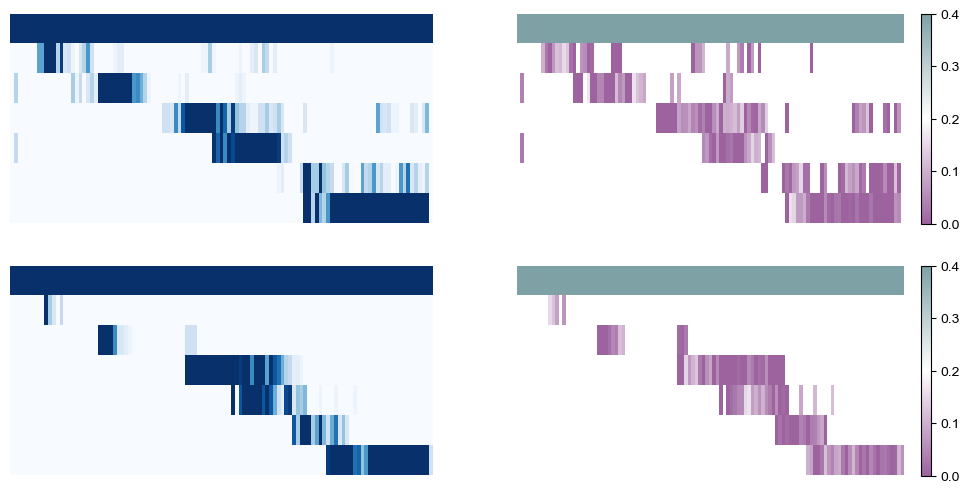

In [11]:
from mazepy.datastruc.neuact import SpikeTrain, TuningCurve
from mazepy.datastruc.variables import VariableBin

def extract_maps(mouse: int):
    with open(join(dir_name, f"{mouse}.pkl"), 'rb') as f:
        res = pickle.load(f)
        
    included_traj = res['raw_included_traj']
    nodes_traj = res['raw_nodes_traj'][included_traj]
    smoothed_loss_traj = res['raw_smoothed_loss_traj'][:7, included_traj]
    route_traj = res['raw_route_traj'][included_traj]
    session_traj = res['raw_session_traj'][included_traj]
    father_nodes_traj = S2F[nodes_traj-1]
    spike_traj = res['spike_traj'][:, included_traj]
    
    binarized_loss = np.where(smoothed_loss_traj <= 30, 1, 0)  # <= 20 cm is retrieved.
    
    map_traj = np.zeros(included_traj.shape[0], dtype=int)-1
    map_order = np.array([0, 2, 4, 6, 1, 3, 5])+1
    map_traj = binarized_loss * map_order[:, np.newaxis]-1
    
    map_traj = np.max(map_traj, axis=0)
    map_traj[binarized_loss[0, :] == 1] = 0  # Map 0 for route 0.

    occu_map = np.zeros((7, 7, 144)) * np.nan
    spatial_map = np.zeros((7, 7, spike_traj.shape[0], 144))
    
    def optimize_map(mt: int, s: int, spike_traj, father_nodes_traj, session_traj, map_traj, spatial_map, occu_map):
        idx = np.where((map_traj == mt) & (session_traj == s))[0]
        spike_train = SpikeTrain(
            activity=spike_traj[:, idx],
            time=np.cumsum(np.repeat(50, idx.shape[0])),  # 50 ms bins
            variable=VariableBin(father_nodes_traj[idx])-1,
        )
        occu_map[s, mt, :] = spike_train.calc_occu_time(t_interv_limits=250, nbins=144)/1000  # in seconds
        spatial_map[s, mt, :, :] = spike_train.calc_tuning_curve(nbins=144).to_array()
        
        corr = np.zeros(map_traj.shape[0])
        idx = np.where((map_traj > mt) & (session_traj == s))[0] if mt == 0 else np.where((map_traj < mt) & (map_traj > 0) & (session_traj == s))[0]
        for i in idx:
            b = father_nodes_traj[i]-1
            corr[i] = np.corrcoef(spatial_map[s, mt, :, b], spike_traj[:, i])[0, 1]
            
        map_traj[corr > 0.15] = mt
        return spatial_map, occu_map, map_traj
    
    for s in tqdm(range(7)):
        for mt in [0, 6, 5, 4, 3, 2, 1]:
            n_iter = 0
            prev_n = np.where((map_traj == mt)&(session_traj == s))[0].shape[0]-1
            while prev_n < np.where((map_traj == mt)&(session_traj == s))[0].shape[0]:
                prev_n = np.where((map_traj == mt)&(session_traj == s))[0].shape[0]
                spatial_map, occu_map, map_traj = optimize_map(mt, s, spike_traj, father_nodes_traj, session_traj, map_traj, spatial_map, occu_map)
                n_iter += 1
        
    res['map_traj'] = map_traj
    return occu_map, spatial_map, res
    
occu_map, spatial_map, res = extract_maps(10232)

corr = np.zeros((7, 7, 144))
for s in range(7):
    for mt in [0, 6, 5, 4, 3, 2, 1]:
        for b in range(144):
            if occu_map[s, mt, b] < 1e-3:
                corr[s, mt, b] = np.nan
            else:
                corr[s, mt, b] = np.corrcoef(spatial_map[s, 0, :, b], spatial_map[s, mt, :, b])[0, 1]

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12, 6))
ax00 = Clear_Axes(axes[0, 0])
ax00.imshow(occu_map[0, :, CP_DSPs[1][0]-1].T, aspect='auto', cmap='Blues', vmin=0, vmax=1, interpolation=None)
ax01 = Clear_Axes(axes[0, 1])
im = ax01.imshow(corr[0, :, CP_DSPs[1][0]-1].T, aspect='auto', cmap=RetrievCmap, vmin=0, vmax=0.4, interpolation=None)
plt.colorbar(im, ax=ax01, fraction=0.046, pad=0.04)
ax10 = Clear_Axes(axes[1, 0])
ax10.imshow(occu_map[6, :, CP_DSPs[1][0]-1].T, aspect='auto', cmap='Blues', vmin=0, vmax=1, interpolation=None)
ax11 = Clear_Axes(axes[1, 1])
im = ax11.imshow(corr[6, :, CP_DSPs[1][0]-1].T, aspect='auto', cmap=RetrievCmap, vmin=0, vmax=0.4, interpolation=None)
plt.colorbar(im, ax=ax11, fraction=0.046, pad=0.04)

d:\Software\Anaconda3\envs\maze\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\Software\Anaconda3\envs\maze\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


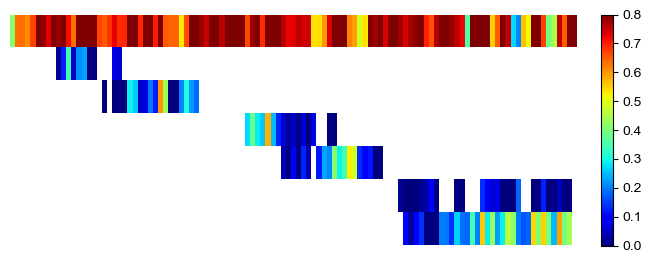

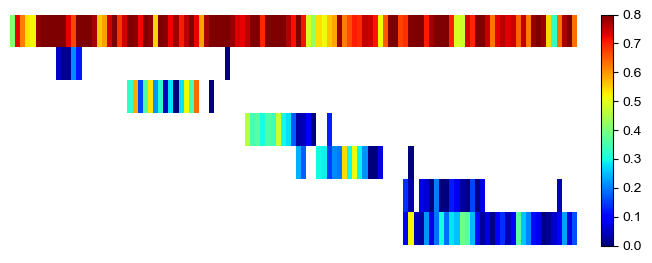

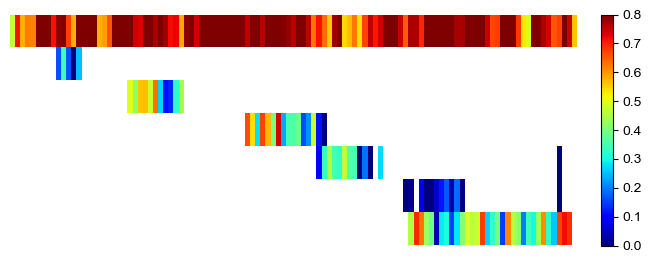

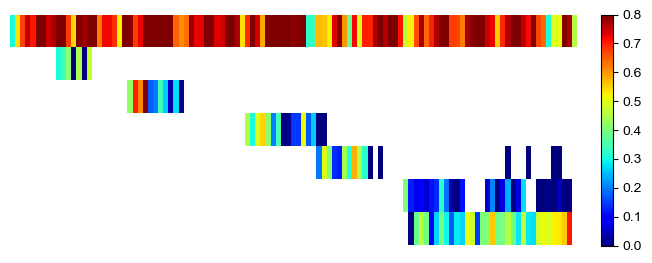

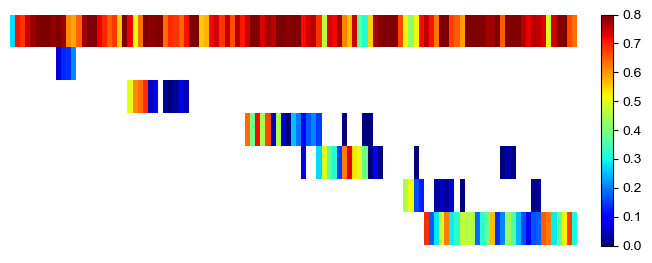

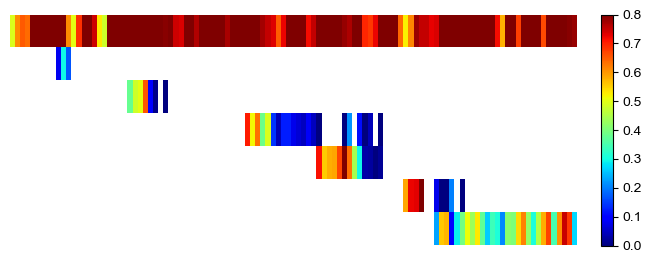

In [19]:
cross_day_corr= np.zeros((6, 7, 144))
for s in range(6):
    for mt in range(7):
        for b in range(144):
            cross_day_corr[s, mt, b] = np.corrcoef(spatial_map[s, mt, :, b], spatial_map[s+1, mt, :, b])[0, 1]
    
    fig = plt.figure(figsize=(8, 3))
    ax = Clear_Axes(plt.axes())
    im = ax.imshow(cross_day_corr[s, :, CP_DSPs[1][0]-1].T, vmin=0, vmax=0.8, cmap='jet', aspect='auto', interpolation=None)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    plt.show()

In [55]:
occu_map, spatial_map, res = extract_maps(10232)

100%|██████████| 7/7 [00:21<00:00,  3.04s/it]


In [65]:
print(np.where(res['map_traj'] < 0)[0].shape)

(2885,)


In [6]:
spike_traj = res['spike_traj'][:, res['raw_included_traj']]
nodes_traj = res['raw_nodes_traj'][res['raw_included_traj']]
father_nodes_traj = S2F[nodes_traj-1]
session_traj = res['raw_session_traj'][res['raw_included_traj']]

corr_traj = np.zeros((7, spike_traj.shape[1]))
map_traj = res['map_traj']
for i in tqdm(range(spike_traj.shape[1])):
    s = session_traj[i]
    b = father_nodes_traj[i]-1
    for mt in range(7):
        corr_traj[mt, i] = np.corrcoef(spatial_map[s, mt, :, b], spike_traj[:, i])[0, 1]

100%|██████████| 174684/174684 [00:44<00:00, 3909.86it/s]


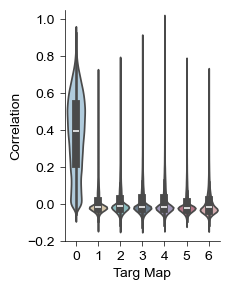

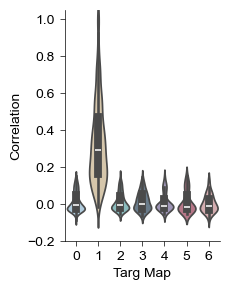

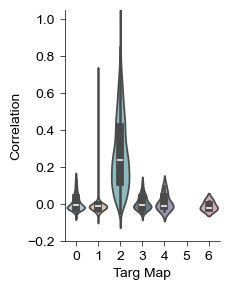

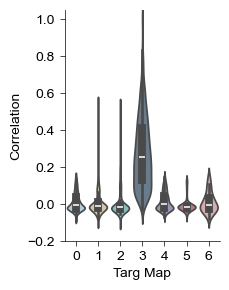

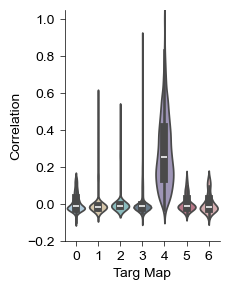

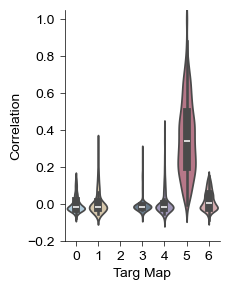

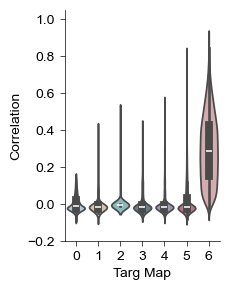

In [8]:
idx = np.where(map_traj >= 0)[0]
data = {
    "Session": np.concatenate([session_traj[idx] for _ in range(7)]),
    "Map": np.concatenate([map_traj[idx] for mt in range(7)]),
    "Correlation": np.concatenate([corr_traj[mt, idx] for mt in range(7)]),
    "Targ Map": np.concatenate([np.repeat(mt, idx.shape[0]) for mt in range(7)])
}


for mt in range(7):
    subdata = SubDict(data, data.keys(), np.where(data['Map'] == mt)[0])
    
    fig = plt.figure(figsize=(2, 3))
    ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
    sns.violinplot(
        x="Targ Map", 
        y="Correlation",
        hue="Targ Map",
        palette=[DSPPalette[i] for i in [0, 4, 1, 5, 2, 6, 3]],
        hue_order=[0, 1, 2, 3, 4, 5, 6],
        data=subdata,
        
        legend=False
    )
    ax.set_ylim(-0.2, 1.05)
    plt.show()